**Load Libraries and Data files:**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
aislesDF = pd.read_csv('aisles.csv')
departmentDF = pd.read_csv('departments.csv')
Order_Products_Prior_DF = pd.read_csv('order_products__prior.csv')
Order_Products_Train_DF = pd.read_csv('order_products__train.csv')
ordersDF = pd.read_csv('orders.csv')
productsDF = pd.read_csv('products.csv')

**Data Analysis or EDA**

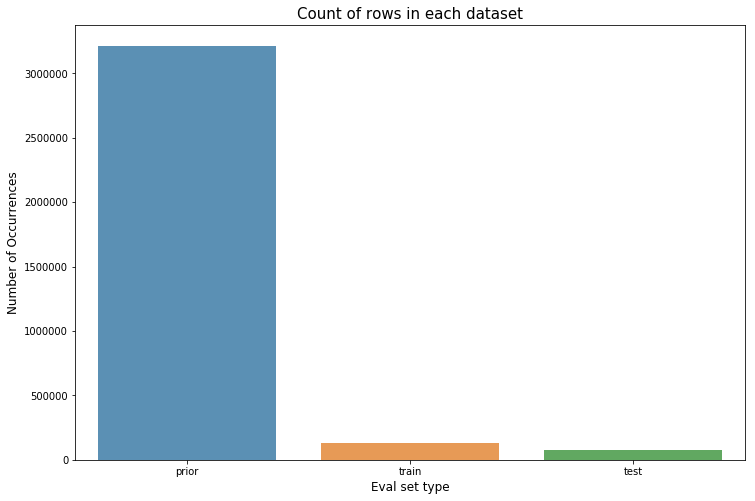

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


In [0]:

#Count no. of rows in each dataset
cnt_srs = ordersDF.eval_set.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.show()
print(cnt_srs)

There have been 3214874 orders in which 131209 are for train data and 75000 test data

In [0]:
#Finding number of customers
def get_unique_count(x):             ## Defining a function to get unique count for user_id from orders.csv
    return len(np.unique(x))

cnt_srs = ordersDF.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

By doing group by users we can see there are 206209 users

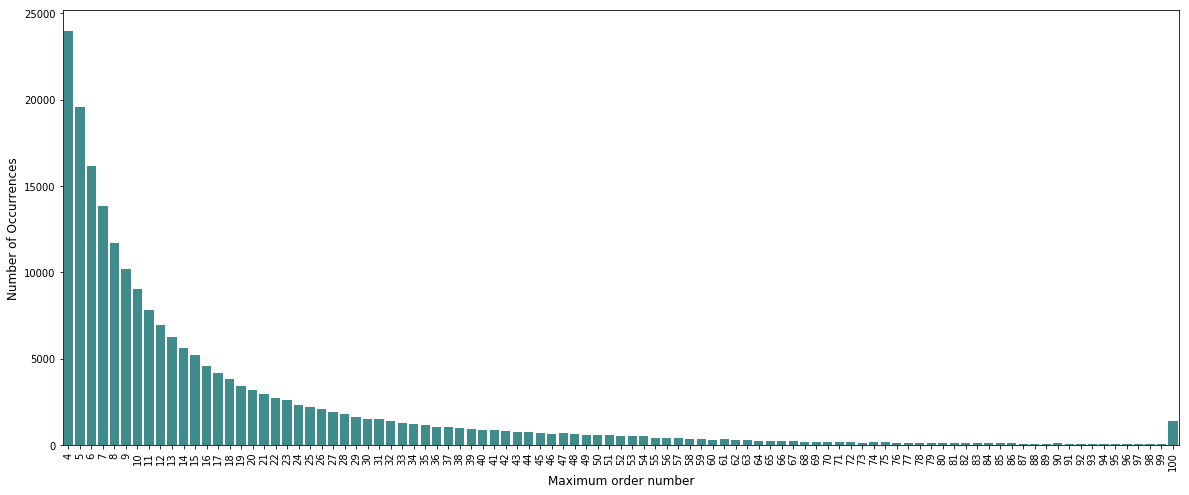

In [0]:
#Validating prior order range
cnt_srs = ordersDF.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

#Bar-graph for the order-reorder counts
plt.figure(figsize=(20,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color = 'teal')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

From the graph above we can find that the minimum number of orders is 4.
And maximum number of orders is  100 

In [0]:

#Changing the data labels into name of days of weeks
import calendar
days=[]

In [0]:

for i in ordersDF['order_dow']:
    days.append(calendar.day_name[i])

In [0]:

#Adding another column for day-name of the week as per the number
ordersDF['converted_dow']=days

In [0]:
# percentage of re-orders in prior set #
Order_Products_Prior_DF.reordered.sum() / Order_Products_Prior_DF.shape[0]


0.5896974667922161

In [0]:
# percentage of re-orders in train set #
Order_Products_Train_DF.reordered.sum() / Order_Products_Train_DF.shape[0]

0.5985944127509629

**On the average its 59% of products are reordered**

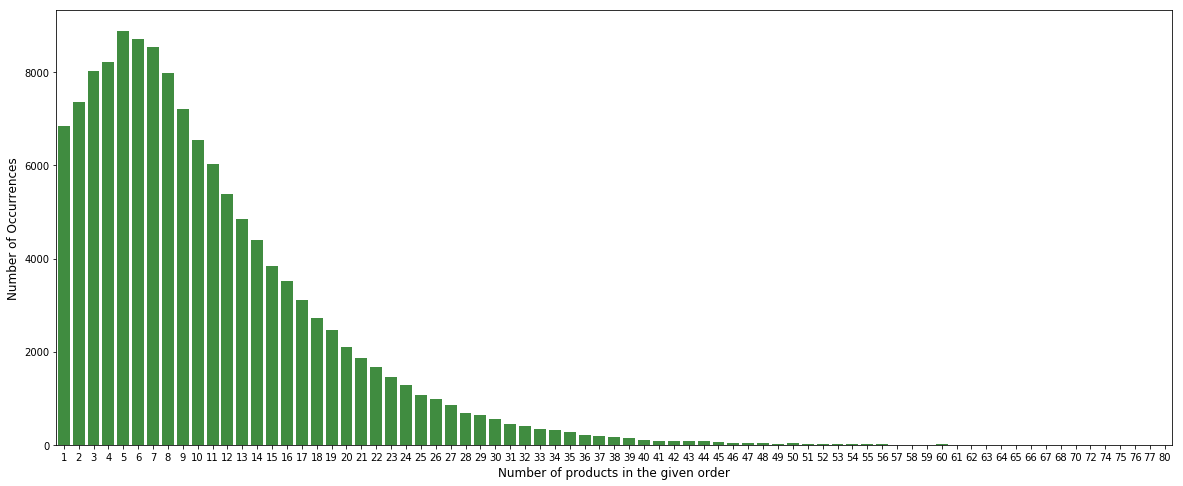

In [0]:
#No. of products per order on an average
grouped_df = Order_Products_Train_DF.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(20,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color = 'green')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
#plt.xticks(rotation='vertical')
plt.show()

**A customer generally orders 5 products in a single average**

In [0]:
Order_Products_Prior_DF = pd.merge(Order_Products_Prior_DF, productsDF, on='product_id', how='left')
Order_Products_Prior_DF = pd.merge(Order_Products_Prior_DF, aislesDF, on='aisle_id', how='left')
Order_Products_Prior_DF = pd.merge(Order_Products_Prior_DF, departmentDF, on='department_id', how='left')
Order_Products_Prior_DF.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [0]:
#Counting the total no of products purchased, i.e. the most popular products.
cnt_srs = Order_Products_Prior_DF['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


**Most of the products bought are related with fruits**

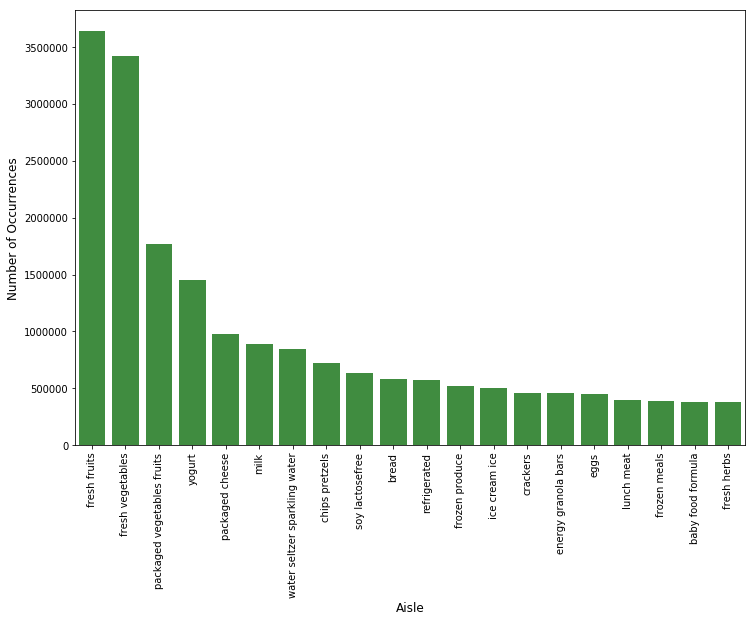

In [0]:
#Count for the sales according to the aisles
cnt_srs = Order_Products_Prior_DF['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**Fruits and fresh vegetables are the top grossing products and their aisles are the most shopped from.**

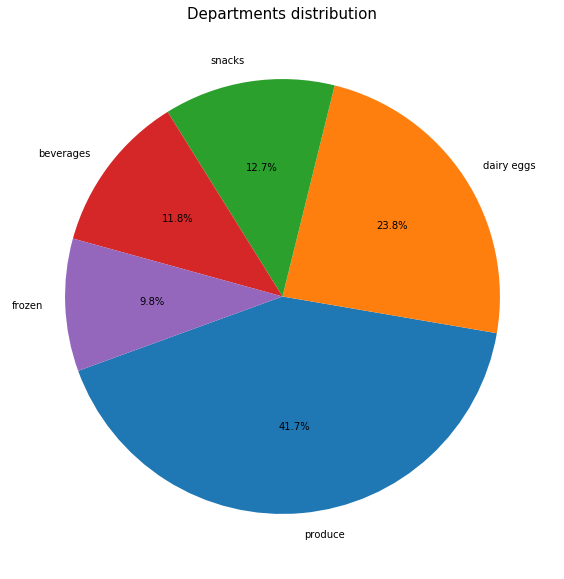

In [0]:
# Pie-chart for department-wise sales.
plt.figure(figsize=(10,10))
temp_series = Order_Products_Prior_DF['department'].value_counts().head(5)
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

**Produce Department is the most selling. **

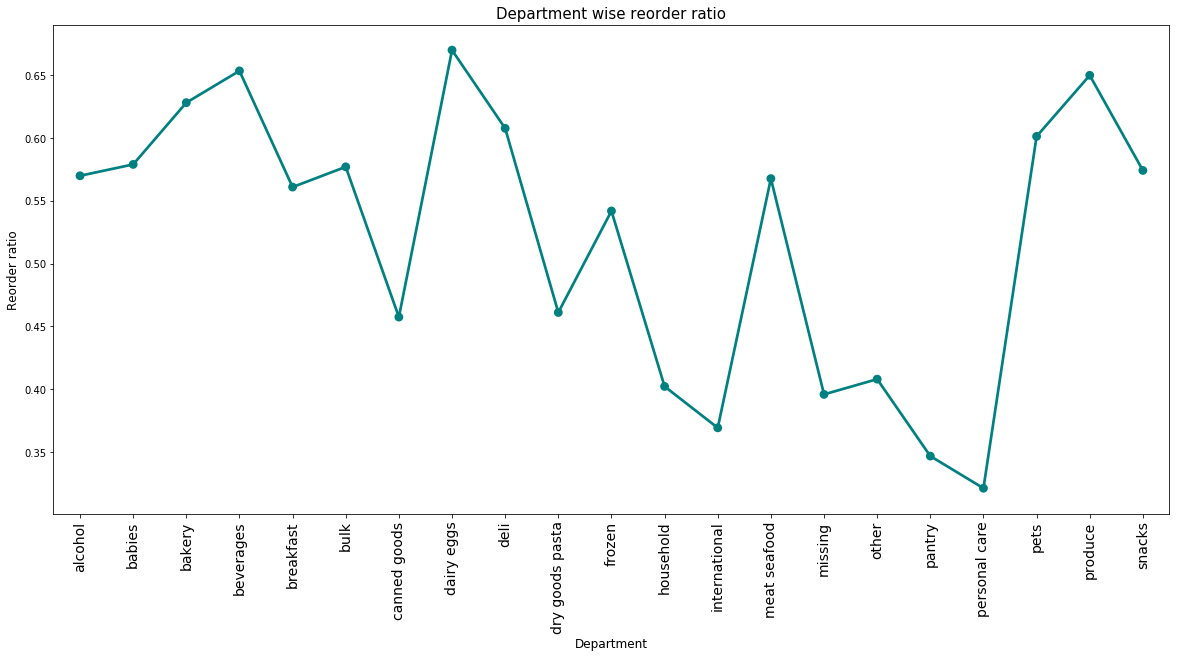

In [0]:
# Finding the reorder ratio with respect to Department.
# This means if a certain product is ordered previously, what are the chances that it will be reordered again.
grouped_df = Order_Products_Prior_DF.groupby(["department"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(20,9))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color='teal')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical',fontsize=14)
plt.show()

**Highest reorder is Dairy eggs and lowest is the personal care.**



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


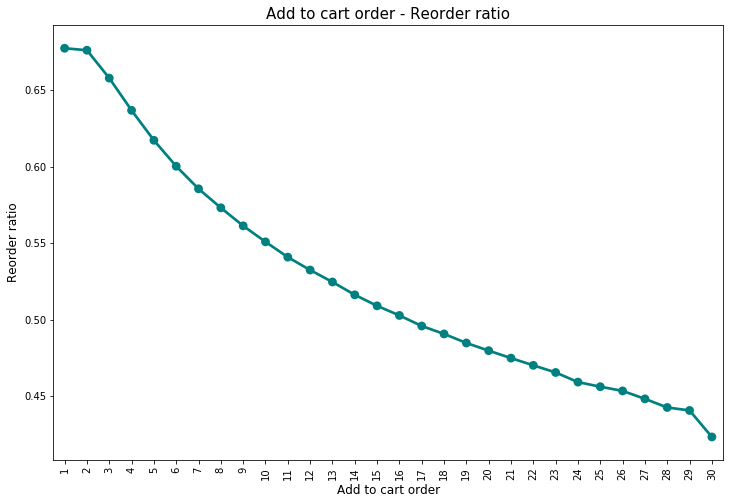

In [41]:
#Add to cart order - reorder ratio
# Here we are trying to understand if the order in which a product was added to the cart will affect it's chances of reordering
Order_Products_Prior_DF["add_to_cart_order_mod"] = Order_Products_Prior_DF["add_to_cart_order"].copy() # Making a copy of order_products_prior
Order_Products_Prior_DF["add_to_cart_order_mod"].loc[Order_Products_Prior_DF["add_to_cart_order_mod"]>30] = 30
grouped_df = Order_Products_Prior_DF.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color='teal')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

**the order in which we out items in our cart does matter when we reorder. **

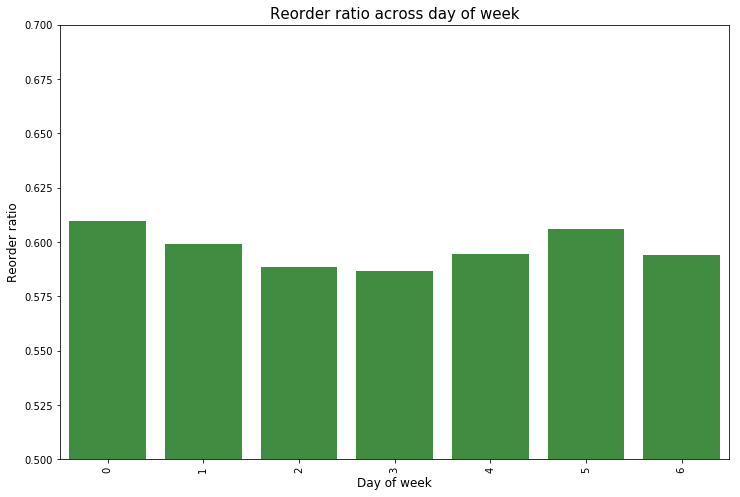

In [44]:
# Reorder ratio across the day of week
Order_Products_Train_DF = pd.merge(Order_Products_Train_DF, ordersDF, on='order_id', how='left')
grouped_df = Order_Products_Train_DF.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color='green')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

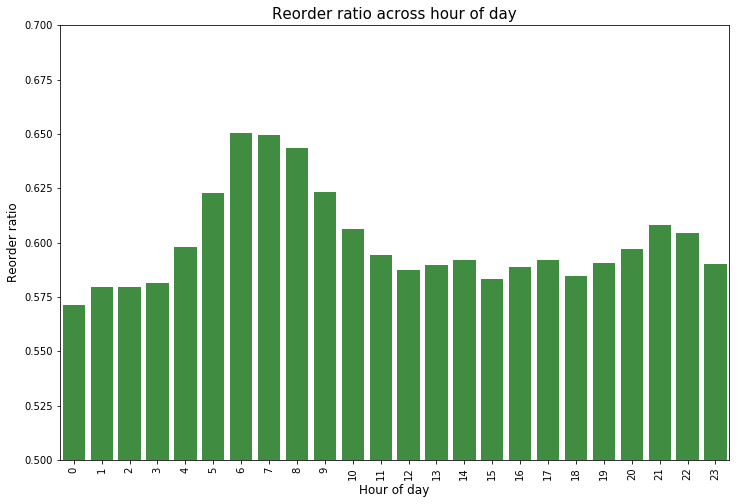

In [46]:
#Reorder ration across hour od day
grouped_df = Order_Products_Train_DF.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color='green')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

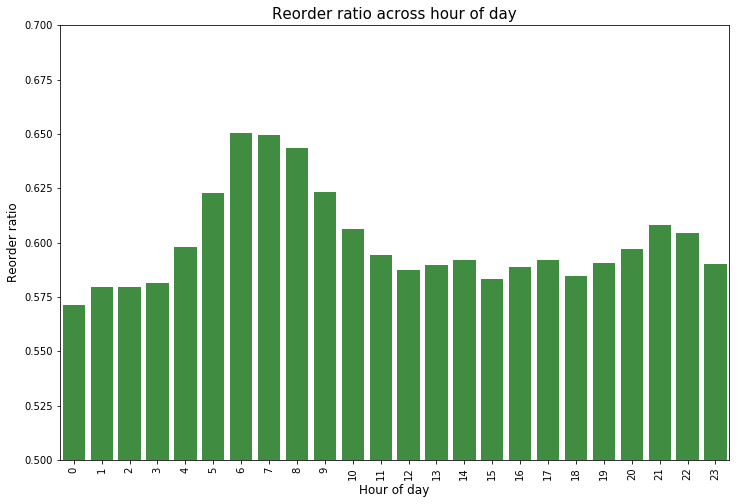

In [47]:
#Reorder ration across hour od day
grouped_df = Order_Products_Train_DF.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color='green')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()